In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()


In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
# Clean data
# it works both ways, but i just personally think numpy percentile is more clear rather than pandas quantile
# i'd still leave it there, since it doesn't apply any changes but creates a copy
df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975)) ]

df = df[df.value.between(np.percentile(df.value, 2.5), np.percentile(df.value, 97.5))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


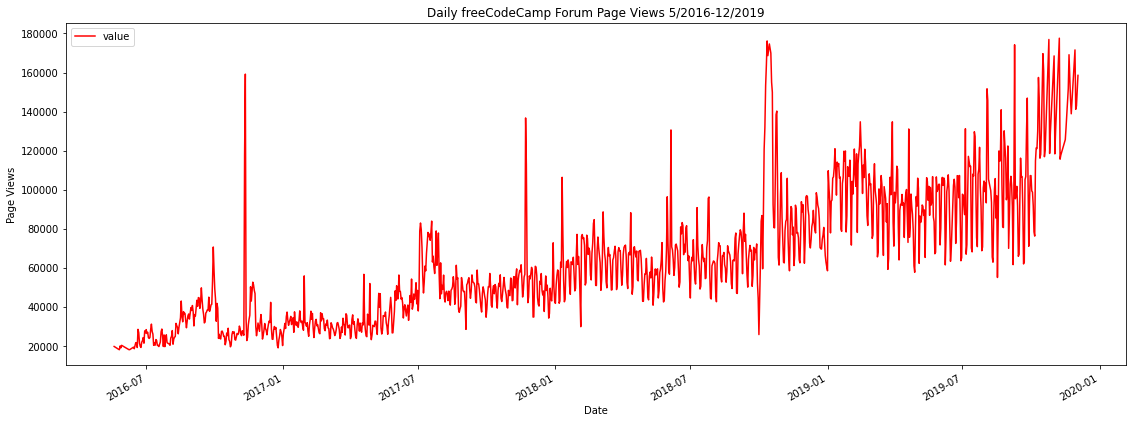

In [13]:
# Draw line plot
fig, ax = plt.subplots(figsize=(19, 7))
df.plot(y='value', use_index=True, ax=ax, color='r', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.xaxis.set_label_text('Date')
ax.yaxis.set_label_text('Page Views')
plt.show()


In [5]:
# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')




In [14]:
# Copy and modify data for monthly bar plot
months=  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = pd.DataFrame([[df.reset_index()[df.reset_index().date.astype(str).str.contains(f"201{j}-{'0' + str(i) if len(str(i))==1 else i}")].value.mean() for i in range(1,13)] for j in range(6,10)], columns=months, index=['2016', '2017', '2018', '2019'])

df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


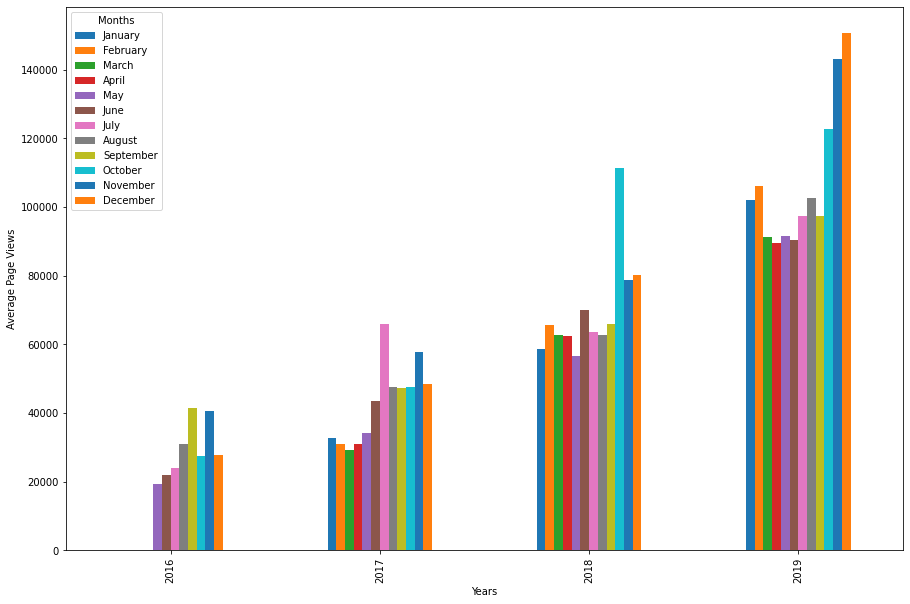

In [15]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(15,10))
df_bar.plot.bar(ax=ax)
ax.xaxis.set_label_text('Years')
ax.yaxis.set_label_text('Average Page Views')
plt.legend(title='Months')
plt.show()


In [8]:
# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')




In [9]:
# just discovored that i could convert it into datetime format
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=[0])

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [10]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# to start boxplot from january
df_box.sort_values(by=['year','date'], ascending=[False, True], inplace=True)
df_box

,date,value,year,month
932,2019-01-01,58508,2019,Jan
933,2019-01-02,109708,2019,Jan
934,2019-01-03,100710,2019,Jan
935,2019-01-04,94514,2019,Jan
936,2019-01-05,77897,2019,Jan
...,...,...,...,...
200,2016-12-27,25138,2016,Dec
201,2016-12-28,28424,2016,Dec
202,2016-12-29,27197,2016,Dec
203,2016-12-30,24804,2016,Dec


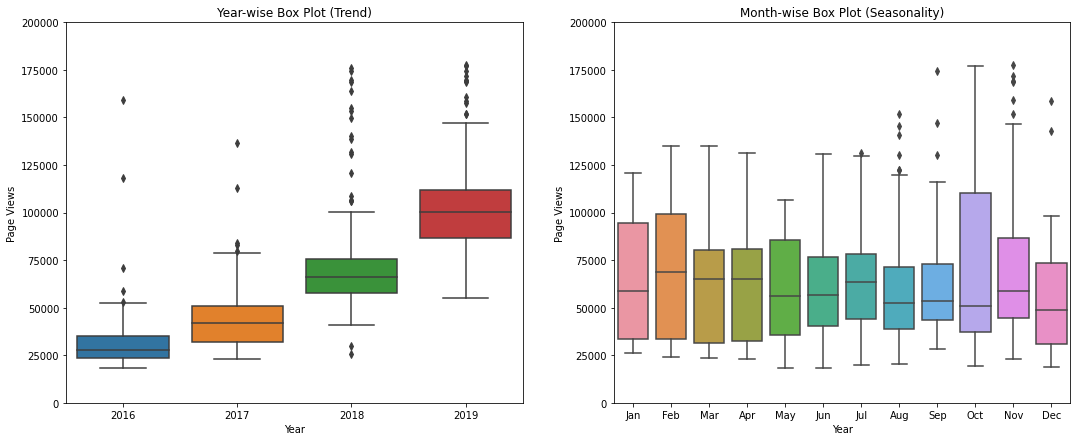

In [11]:
# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1,2, figsize=(18, 7))
box_1 = sns.boxplot(x='year', y='value', data=df_box, ax=ax[0])
box_2 = sns.boxplot(x='month', y='value', data=df_box, ax=ax[1])
box_1.axes.set_title('Year-wise Box Plot (Trend)')
box_2.axes.set_title('Month-wise Box Plot (Seasonality)')
ax[0].xaxis.set_label_text('Year')
ax[0].yaxis.set_label_text('Page Views')
ax[1].xaxis.set_label_text('Year')
ax[1].yaxis.set_label_text('Page Views')
ax[0].set(ylim=(0,200000))
ax[1].set(ylim=(0,200000))
plt.show()

In [12]:

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')
